In [1]:
using CSV
using DataFrames
using GLM
using Plots

In [2]:
# pwd()
username = splitdir(homedir())[end];
root = "/Users/$username/workspace/wage-gap";

In [3]:
df = CSV.read("$root/wage2015_subsample_inference.csv", DataFrame);
print("Total number of instances in df (unmodified, raw data): " * string(length(df.rownames)))

Total number of instances in df (unmodified, raw data): 5150

In [4]:
df_scl = filter(:scl => ==(1), df);

In [5]:
df_clg = filter(:clg => ==(1), df);

In [6]:
sample = [df_scl;df_clg];
print("Total number of instances in sample (filtered by (scl or clg == 1)): " * string(length(sample.rownames)))

Total number of instances in sample (filtered by (scl or clg == 1)): 3068

In [7]:
first(sample, 8)

8×21 DataFrame
 Row │ rownames  wage      lwage    sex      shs      hsg      scl      clg    ⋯
     │ Int64     Float64   Float64  Float64  Float64  Float64  Float64  Float6 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │       84  12.0192   2.48651      1.0      0.0      0.0      1.0      0. ⋯
   2 │       89  13.4615   2.59984      1.0      0.0      0.0      1.0      0.
   3 │      119   8.65385  2.158        0.0      0.0      0.0      1.0      0.
   4 │      135  10.6838   2.36872      1.0      0.0      0.0      1.0      0.
   5 │      144  11.5385   2.44569      1.0      0.0      0.0      1.0      0. ⋯
   6 │      152  16.3043   2.79143      1.0      0.0      0.0      1.0      0.
   7 │      160  12.0      2.48491      0.0      0.0      0.0      1.0      0.
   8 │      206  13.9423   2.63493      1.0      0.0      0.0      1.0      0.
                                                              14 columns omitted

In [8]:
# Gráficos descriptivos
# Histogramas, barplots, scatterplots, pie plots, etc
# wage, log-wage, sex, some high school, high school graduated, some college, college graduated, advance degree, experience


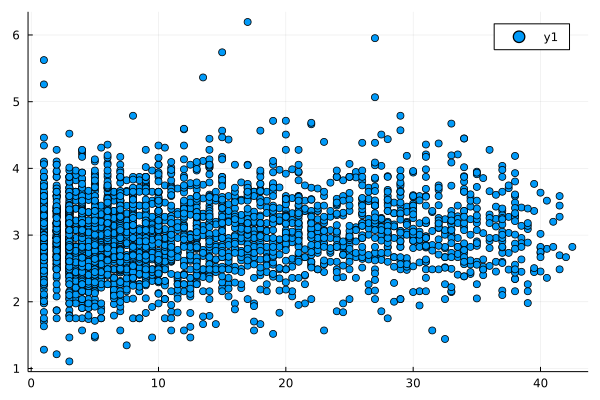

In [9]:
scatter(sample[!, "exp1"], sample[!, "lwage"])

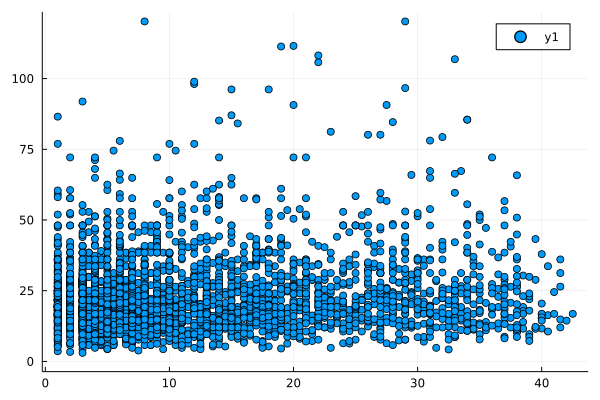

In [10]:
scatter(sample[!, "exp1"], sample[!, "wage"], ylim=[0, 120])

In [11]:
linear_model_basic = lm(@formula(lwage ~ sex + exp1 + shs + hsg + mw + so + we + occ2 + ind2), sample)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

lwage ~ 1 + sex + exp1 + shs + hsg + mw + so + we + occ2 + ind2

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────
                    Coef.     Std. Error       t  Pr(>|t|)    Lower 95%     Upper 95%
─────────────────────────────────────────────────────────────────────────────────────
(Intercept)   3.43657        0.0380123     90.41    <1e-99    3.36204      3.51111
sex          -0.0852733      0.0188515     -4.52    <1e-05   -0.122236    -0.0483105
exp1          0.00707706     0.000894951    7.91    <1e-14    0.0053223    0.00883183
shs           0.0          NaN            NaN       NaN     NaN          NaN
hsg           0.0          NaN            NaN       NaN     NaN          NaN
mw           -0.0615643      0.026331      -2.34    0.0194   -0.113193    -0.

In [12]:
linear_model_flex = lm(@formula(lwage ~ sex + exp1 + exp1*exp2 + exp1*exp3 + exp1*exp4 + exp1*hsg + exp1*ind2 + exp1*mw + exp1*occ2 + exp1*shs + exp1*so + exp1*we +
            exp2 + exp2*exp3 + exp2*exp4 + exp2*hsg + exp2*ind2 + exp2*mw + exp2*occ2 + exp2*shs + exp2*so + exp2*we +
            exp3 + exp3*exp4 + exp3*hsg + exp3*ind2 + exp3*mw + exp3*occ2 + exp3*shs + exp3*so + exp3*we +
            exp4 + exp4*hsg + exp4*ind2 + exp4*mw + exp4*occ2 + exp4*shs + exp4*so + exp4*we +
            hsg + hsg*ind2 + hsg*mw + hsg*occ2 + hsg*shs + hsg*so + hsg*we +
            ind2 + ind2*mw + ind2*occ2 + ind2*shs + ind2*so + ind2*we +
            mw + mw*occ2 + mw*shs + mw*so + mw*we +
            occ2 + occ2*shs + occ2*so + occ2*we +
            shs + shs*so + shs*we +
            so + so*we +
            we), sample)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

lwage ~ 1 + sex + exp1 + exp2 + exp3 + exp4 + hsg + ind2 + mw + occ2 + shs + so + we + exp1 & exp2 + exp1 & exp3 + exp1 & exp4 + exp1 & hsg + exp1 & ind2 + exp1 & mw + exp1 & occ2 + exp1 & shs + exp1 & so + exp1 & we + exp2 & exp3 + exp2 & exp4 + exp2 & hsg + exp2 & ind2 + exp2 & mw + exp2 & occ2 + exp2 & shs + exp2 & so + exp2 & we + exp3 & exp4 + exp3 & hsg + exp3 & ind2 + exp3 & mw + exp3 & occ2 + exp3 & shs + exp3 & so + exp3 & we + exp4 & hsg + exp4 & ind2 + exp4 & mw + exp4 & occ2 + exp4 & shs + exp4 & so + exp4 & we + hsg & ind2 + hsg & mw + hsg & occ2 + hsg & shs + hsg & so + hsg & we + ind2 & mw + ind2 & occ2 + ind2 & shs + ind2 & so + ind2 & we + mw & occ2 + mw & shs + mw & so + mw & we + occ2 & shs + occ2 & so + occ2 & we + shs & so + shs & we + so & we

Coefficients:
────────────────────────────────

In [13]:
using PyCall

np = pyimport("numpy");
plt = pyimport("matplotlib.pyplot");

In [14]:
function coefplot(lmb, lmf)
    varname = ["Basic Model", "        Flexible Model"]
    coefs = [coef(lmb)[2], coef(lmf)[2]]
    error = [stderror(lmb)[2], stderror(lmf)[2]]
    scatter(varname, coefs,
        legend = false,
        yerror = 1.96 .* error,
        title = "Interval confidence of sex coefficient",
        xrotation = 90,
        xlim = (0.3, 1.8),
        ylim = (-0.13, 0))
    savefig("$root/notebooks/coefplot_jl.png")
end

coefplot (generic function with 1 method)

In [15]:
coefplot(linear_model_basic, linear_model_flex)

In [16]:
function poly_regression(df, degree)
    z = np.polyfit(df[!, "exp1"], df[!, "lwage"], degree)
    p = np.poly1d(z)
    output = DataFrame("x" => df[!, "exp1"], "y" => p(df[!, "exp1"]))
    output = sort(output, [order("x")])
    return output
end

poly_regression (generic function with 1 method)

In [17]:
using PyCall

np = pyimport("numpy");
plt = pyimport("matplotlib.pyplot");

In [18]:
reg_line_scl = poly_regression(df_scl, 4);
reg_line_clg = poly_regression(df_clg, 4);

In [19]:
fig, ax = plt.subplots(figsize=(10, 7))
ax = plt.gca()
ax.set_ylim([2, 3.5])
ax.set_xlim([0, 40])

# For Some college:
plt.scatter(df_scl[!, "exp1"], df_scl[!, "lwage"], color=(0.9, 0.9, 0.9, 0.4), label="Actual")
plt.plot(reg_line_scl[!, "x"], reg_line_scl[!, "y"], "--", color=(0.2, 0.2, 0.2), label="Fitted")
ax.annotate("College Graduated", xy=(10, 3.15), xytext=(5, 3.27), arrowprops = Dict("facecolor" => "black", "shrink" => 0.01))

# For College graduated:
plt.scatter(df_clg[!, "exp1"], df_clg[!, "lwage"], color=(0.9, 0.9, 0.9, 0.4), label="_nolegend_")
plt.plot(reg_line_clg[!, "x"], reg_line_clg[!, "y"], "--", color=color=(0.2, 0.2, 0.2), label="_nolegend_")
ax.annotate("Some College", xy=(9, 2.779), xytext=(7, 2.6), arrowprops = Dict("facecolor" => "black", "shrink" => 0.01))

plt.ylabel("Log Wage")
plt.xlabel("Years of Experience")
plt.title("Wage and Experience for College and High School Graduates")
plt.legend()
plt.savefig("$root/notebooks/wageexpforclgandscl_jl.png")